In [1]:
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'Bayes_rule-300x172.webp', 'datasets_4133_8841_sample.csv', 'debug.log', 'DEEP LEARNING.pptx', 'images.png', 'images1.jpg', 'LAT PROG', 'NLP (2).ipynb', 'NLP.ipynb', 'osha.xlsx', 'Project_Accidents.ipynb', 'Research Paper.pdf', 'SPACY CHEATSHEET.png', 'tagged1000.csv', 'Text Analysis - Copy.pptx', 'Text Analysis.pptx', 'TFIDF.png', 'trf_deep_learning.pdf', 'zhang2019(3).pdf', '~$Text Analysis.pptx']


In [3]:
import numpy as np

C:\Users\ryans\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ryans\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ryans\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('./tagged1000.csv')
df.head()

,Unnamed: 0,id,title,Summary2,cause,newkeys,title.new,summary.new,Tagged2
0,0,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of Templ...,Other,"\nconstruction, undrgrd power line, highway, ...",two workers are struck by motor vehicle and o...,On august 27 2013 employees #1 and #2 of templ...,traffic
1,1,202673471,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 Empl...,[],"\nconstruction, equipment operator, industria...",foreman is fatally crushed when forklift tips...,At approximately 6:30 a.m. on may 13 2013 empl...,collapse of object
2,2,202509832,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing vin...,Fall from/with ladder,"\ninstalling, ladder, scaffold, structure mov...",employee suffers abdominal fracture in fall f...,On april 9 2013 employee #1 was installing vin...,falls
3,3,201562840,Employee'S Body Is Caught In Asphalt Machine ...,On November 27 2012 Employee #1 was operating ...,Crushed/run,"\nasphalt, machine operator, caught by, cloth...",employee's body is caught in asphalt machine ...,On november 27 2012 employee #1 was operating ...,caught in/between objects
4,4,202478632,Employee Is Punctured In Abdomen With Nail,At approximately 11:57 a.m. on September 28 20...,Other,"\nslip, nail, puncture, abdomen, fall\n",employee is punctured in abdomen with nail,At approximately 11:57 a.m. on september 28 20...,struck by moving objects


In [6]:
#preprocessing of data
import nltk
import numpy as np
import string
from keras.preprocessing.text import text_to_word_sequence #for tokenization
PUNCT_TO_REMOVE = string.punctuation #punctuation removal
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    abc = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    result = ''.join(i for i in abc if not i.isdigit()) #removal of numbers
    return result

df["punctr"] = df["Summary2"].apply(lambda text: remove_punctuation(text.lower())) #remove punctuation
df['punctr'].head()

Using TensorFlow backend.


0    on august   employees  and  of templar inc a c...
1    at approximately  am on may   employee  a fore...
2    on april   employee  was installing vinyl sidi...
3    on november   employee  was operating an aspha...
4    at approximately  am on september   employee  ...
Name: punctr, dtype: object

In [7]:
def tokenize(text):#for tokenization
    tokens = text_to_word_sequence(text)
    return tokens
df['clean_tokens_summ']=df['punctr'].apply(lambda x: tokenize(x.lower()))
df['clean_tokens_cause']=df['cause'].apply(lambda x: tokenize(x.lower()))
import nltk
#stopwords removal
STOPWORDS = nltk.corpus.stopwords.words('english')+['june','january','february','march','april','may','july','august','september','october','november','december']
def remove_stopwords(text):
    cleantext = [word for word in text if word not in STOPWORDS]
    return cleantext
df["summ_wstp"] = df["clean_tokens_summ"].apply(lambda text: remove_stopwords(text))
df['summ_wstp'].head()

0    [employees, templar, inc, construction, compan...
1    [approximately, employee, foreman, regularly, ...
2    [employee, installing, vinyl, sidings, single,...
3    [employee, operating, asphaltpulverizing, mach...
4    [approximately, employee, working, coworker, j...
Name: summ_wstp, dtype: object

In [8]:
df['summ_wstp'][0]

['employees',
 'templar',
 'inc',
 'construction',
 'company',
 'specializing',
 'fiber',
 'optic',
 'installation',
 'services',
 'working',
 'along',
 'highway',
 'highway',
 'speed',
 'limit',
 'posted',
 'miles',
 'per',
 'hour',
 'employee',
 'marking',
 'location',
 'underground',
 'line',
 'ran',
 'turn',
 'lane',
 'employee',
 'next',
 'employee',
 'performing',
 'duties',
 'flagger',
 'privately',
 'owned',
 'vehicle',
 'travelling',
 'travelthrough',
 'lane',
 'vehicle',
 'veered',
 'right',
 'entered',
 'turn',
 'lane',
 'struck',
 'workers',
 'emergency',
 'medical',
 'services',
 'called',
 'employee',
 'declared',
 'dead',
 'scene',
 'employee',
 'refused',
 'emergency',
 'medical',
 'treatment',
 'bruises',
 'received',
 'struck']

In [9]:
#POS TAGGING
import nltk
from nltk import word_tokenize
def pos(text):
    post = nltk.pos_tag(text)
    return post
df["summ_post"] = df["summ_wstp"].apply(lambda text: pos(text))
df['summ_post'][0]

[('employees', 'NNS'),
 ('templar', 'VBP'),
 ('inc', 'JJ'),
 ('construction', 'NN'),
 ('company', 'NN'),
 ('specializing', 'VBG'),
 ('fiber', 'NNP'),
 ('optic', 'JJ'),
 ('installation', 'NN'),
 ('services', 'NNS'),
 ('working', 'VBG'),
 ('along', 'RB'),
 ('highway', 'RB'),
 ('highway', 'JJ'),
 ('speed', 'NN'),
 ('limit', 'NN'),
 ('posted', 'VBD'),
 ('miles', 'NNS'),
 ('per', 'IN'),
 ('hour', 'NN'),
 ('employee', 'NN'),
 ('marking', 'VBG'),
 ('location', 'NN'),
 ('underground', 'JJ'),
 ('line', 'NN'),
 ('ran', 'VBD'),
 ('turn', 'NN'),
 ('lane', 'NN'),
 ('employee', 'NN'),
 ('next', 'IN'),
 ('employee', 'NN'),
 ('performing', 'VBG'),
 ('duties', 'NNS'),
 ('flagger', 'RBR'),
 ('privately', 'RB'),
 ('owned', 'VBN'),
 ('vehicle', 'NN'),
 ('travelling', 'VBG'),
 ('travelthrough', 'IN'),
 ('lane', 'NN'),
 ('vehicle', 'NN'),
 ('veered', 'VBD'),
 ('right', 'RB'),
 ('entered', 'VBN'),
 ('turn', 'VBP'),
 ('lane', 'JJ'),
 ('struck', 'JJ'),
 ('workers', 'NNS'),
 ('emergency', 'NN'),
 ('medical', 'J

In [10]:
#lemmatization
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):#lemmatization
    ne = []
    for w in text:
        ne.append((lemmatizer.lemmatize(w[0]),w[1]))
    return ne
df["summ_lmt"] = df["summ_post"].apply(lambda text: lemmatize_words(text))

In [11]:
def wordpos(d):
    ne = []
    for w in d:
        ne.append(w[0]+'/'+w[1])
    return ne
df['summ_final']= df['summ_lmt'].apply(lambda a: wordpos(a))

In [12]:
# arr=df['summ_post'].to_numpy()
# # arr.flatten()
# printarr
df['summ_final'].head()
#df['summ_lmt'].iloc[8]

0    [employee/NNS, templar/VBP, inc/JJ, constructi...
1    [approximately/RB, employee/NN, foreman/NNS, r...
2    [employee/NN, installing/VBG, vinyl/JJ, siding...
3    [employee/NN, operating/VBG, asphaltpulverizin...
4    [approximately/RB, employee/NN, working/VBG, c...
Name: summ_final, dtype: object

In [13]:
# def remove_punc(text):
#     """custom function to remove the punctuation"""
#     abc = text.translate(str.maketrans('', '',' PUNCT_TO_REMOVE'))
#     result = ''.join(i for i in abc if not i.isdigit()) #removal of numbers
#     return result

def word2sent(d):
    return ' '.join(d)
df['summ_final'] = df['summ_final'].apply(lambda a: word2sent(a))

In [14]:
df.Tagged2.drop_duplicates()

0                               traffic
1                    collapse of object
2                                 falls
3             caught in/between objects
4              struck by moving objects
16                               others
29      exposure to chemical substances
32                  fires and explosion
45                        electrocution
153            struck by falling object
218    exposure to extreme temperatures
Name: Tagged2, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_tfidf = le.fit_transform(df['Tagged2']) #y_dependent
print(y_tfidf)
# y_tfidf.shape

[10  1  5  0  9  5  1  0  5 10  5  1  1  5  5  9  7  1  9  7  9  0  9  9
  9  0 10  5  7  3  9  9  6  6  6  6  6  1  6  1  6  1  1  1  1  2  5  9
  1  1  1  0  7  9  5  5  5  2  5  7  0  0  0  0  0  0  0  0  0  1  5  9
  7  5  5  5  9  5  2  2  9  7  3  6  5  3  6  3  0  5  5  5  5  5  5  5
  1  9  9 10  9  1  2  2  9 10  2 10 10 10 10 10 10 10 10 10  7  6  6  5
  7  3  7  6  1  3  0  0  9  0  9  5  5  5  5  5  5  5  5  5  1  5  1  5
  5  2  5  5  7  3  3  5  9  8  5  1  1  5  5  1  5  9  5  1  5  8  5  5
  5  5  6  6  6  6  6  6  2  2  9  6  3  3  3  9  1  6  2  2  2  9  9  1
  1  1  1  1  5  1  5  8  5  5  9  0  5  5  7  2  7  5  3  5  5  5  1  3
  2  2  4  7  7  4 10 10  4  4  5 10  4 10  4  4 10  8  1  1  0  1  0  9
  1  5  9  6  5  5  8  2  5  9  2  2  5  5  2  5  5  5  6  5  9  0  9  0
  9  0  0  0  1 10 10  1  5  5  9  8  5  5  9  7  8 10 10  7  9 10 10  0
  1  0  0  7 10  9  9  9  9  9  9  9  0  9  8  9  9  9  9  2 10  9  2  2
  0  1  8  1  0  8  9  9  0  9  9  8  9 10 10 10  0

In [16]:
df['summ_final'].head()
# corpus = df['summ_final']
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf  = TfidfVectorizer()
# corpus = tfidf.fit_transform(corpus)

0    employee/NNS templar/VBP inc/JJ construction/N...
1    approximately/RB employee/NN foreman/NNS regul...
2    employee/NN installing/VBG vinyl/JJ siding/NNS...
3    employee/NN operating/VBG asphaltpulverizing/V...
4    approximately/RB employee/NN working/VBG cowor...
Name: summ_final, dtype: object

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf  = TfidfVectorizer(ngram_range=(1, 1))
X_tfidf = tfidf.fit_transform(df['summ_final'])
print(X_tfidf[0])
#independent data

  (0, 4165)	0.0716538545516024
  (0, 609)	0.09793603503687141
  (0, 5542)	0.0679204878897774
  (0, 4223)	0.13435050879521274
  (0, 4548)	0.0792460939089088
  (0, 1290)	0.07307374793968979
  (0, 1305)	0.11763501439836946
  (0, 687)	0.06837929932713582
  (0, 3202)	0.11879867711205097
  (0, 1668)	0.12415151019432534
  (0, 5989)	0.06458998933503964
  (0, 5124)	0.10671855481854507
  (0, 1720)	0.0917481978987332
  (0, 4403)	0.05757266781629139
  (0, 5786)	0.12867511612050153
  (0, 5534)	0.14234952550416582
  (0, 5533)	0.12427293955890861
  (0, 5789)	0.1717680381388959
  (0, 5782)	0.09455487001729775
  (0, 3633)	0.12067609941154843
  (0, 3978)	0.13435050879521274
  (0, 4133)	0.06933023051736047
  (0, 2001)	0.11763501439836946
  (0, 1592)	0.0917481978987332
  (0, 3743)	0.07428816221313464
  :	:
  (0, 3253)	0.11500070673683722
  (0, 5780)	0.0995308972711964
  (0, 3899)	0.13435050879521274
  (0, 3002)	0.12067609941154843
  (0, 4943)	0.11267708270259531
  (0, 2435)	0.1717680381388959
  (0, 4132)	

In [90]:
df['summ_post'].head()

0    [(employees, NNS), (templar, VBP), (inc, JJ), ...
1    [(approximately, RB), (employee, NN), (foreman...
2    [(employee, NN), (installing, VBG), (vinyl, JJ...
3    [(employee, NN), (operating, VBG), (asphaltpul...
4    [(approximately, RB), (employee, NN), (working...
Name: summ_post, dtype: object

In [91]:
df['summ_post'][0]

[('employees', 'NNS'),
 ('templar', 'VBP'),
 ('inc', 'JJ'),
 ('construction', 'NN'),
 ('company', 'NN'),
 ('specializing', 'VBG'),
 ('fiber', 'NNP'),
 ('optic', 'JJ'),
 ('installation', 'NN'),
 ('services', 'NNS'),
 ('working', 'VBG'),
 ('along', 'RB'),
 ('highway', 'RB'),
 ('highway', 'JJ'),
 ('speed', 'NN'),
 ('limit', 'NN'),
 ('posted', 'VBD'),
 ('miles', 'NNS'),
 ('per', 'IN'),
 ('hour', 'NN'),
 ('employee', 'NN'),
 ('marking', 'VBG'),
 ('location', 'NN'),
 ('underground', 'JJ'),
 ('line', 'NN'),
 ('ran', 'VBD'),
 ('turn', 'NN'),
 ('lane', 'NN'),
 ('employee', 'NN'),
 ('next', 'IN'),
 ('employee', 'NN'),
 ('performing', 'VBG'),
 ('duties', 'NNS'),
 ('flagger', 'RBR'),
 ('privately', 'RB'),
 ('owned', 'VBN'),
 ('vehicle', 'NN'),
 ('travelling', 'VBG'),
 ('travelthrough', 'IN'),
 ('lane', 'NN'),
 ('vehicle', 'NN'),
 ('veered', 'VBD'),
 ('right', 'RB'),
 ('entered', 'VBN'),
 ('turn', 'VBP'),
 ('lane', 'JJ'),
 ('struck', 'JJ'),
 ('workers', 'NNS'),
 ('emergency', 'NN'),
 ('medical', 'J

In [92]:
# from sklearn.preprocessing import LabelEncoder







# import nltk
# import string

# def tokenize(text):
#     stem = nltk.stem.SnowballStemmer('english')
#     text = text.lower()

#     for token in nltk.word_tokenize(text):
#         if token in string.punctuation: continue
#         yield stem.stem(token)

# corpus = [
#     "The elephant sneezed at the sight of potatoes.",
#     "Bats can see via echolocation. See the bat sight sneeze!",
#     "Wondering, she opened the door to the studio.",
# ]




In [93]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf  = TfidfVectorizer()
# # corpus = [
# #     "The elephant sneezed at the sight of potatoes.",
# #     "Bats can see via echolocation. See the bat sight sneeze!",
# #     "Wondering, she opened the door to the studio.",
# # ]
# corpus = tfidf.fit_transform(corpus)

In [94]:
# print(corpus)

In [95]:
# a=df['summ_tfidf'].iloc[0]
# from scipy.sparse import csr_matrix
# csr=csr_matrix(a.any())
# csr.toarray()

In [96]:
# corpus=df['summ_lmt'].head()

In [97]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf  = TfidfVectorizer()

In [98]:
# corpus = tfidf.fit_transform(corpus)

In [99]:
# print(corpus[1])

In [100]:
# def tokenize(text):#for tokenization
#     tokens = text_to_word_sequence(text)
#     return tokens
# df['try']=corpus
# # corpus.apply(lambda x: tokenize(x.lower()))
# df['try']=df['try'].apply(lambda text: tokenize(text))

In [101]:
#preprocessing of data
import nltk
import numpy as np
import string
from keras.preprocessing.text import text_to_word_sequence #for tokenization
PUNCT_TO_REMOVE = string.punctuation #punctuation removal
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    abc = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    result = ''.join(i for i in abc if not i.isdigit()) #removal of numbers
    return result

df["tit_punctr"] = df["title"].apply(lambda text: remove_punctuation(text.lower())) #remove punctuation
df['tit_punctr'].head()

0     two workers are struck by motor vehicle and o...
1     foreman is fatally crushed when forklift tips...
2     employee suffers abdominal fracture in fall f...
3     employees body is caught in asphalt machine  ...
4          employee is punctured in abdomen with nail 
Name: tit_punctr, dtype: object

In [102]:
def tokenize(text):#for tokenization
    tokens = text_to_word_sequence(text)
    return tokens
df['clean_tokens_tit']=df['tit_punctr'].apply(lambda x: tokenize(x.lower()))
# df['clean_tokens_cause']=df['cause'].apply(lambda x: tokenize(x.lower()))
import nltk
#stopwords removal
STOPWORDS = nltk.corpus.stopwords.words('english')+['june','january','february','march','april','may','july','august','september','october','november','december']
def remove_stopwords(text):
    cleantext = [word for word in text if word not in STOPWORDS]
    return cleantext
df["tit_wstp"] = df["clean_tokens_tit"].apply(lambda text: remove_stopwords(text))
df['tit_wstp'].head()

0    [two, workers, struck, motor, vehicle, one, ki...
1          [foreman, fatally, crushed, forklift, tips]
2    [employee, suffers, abdominal, fracture, fall,...
3    [employees, body, caught, asphalt, machine, dies]
4                 [employee, punctured, abdomen, nail]
Name: tit_wstp, dtype: object

In [103]:
import nltk
from nltk import word_tokenize
def pos(text):
    post = nltk.pos_tag(text)
    return post
df["tit_post"] = df["tit_wstp"].apply(lambda text: pos(text))
df['tit_post'][0]

[('two', 'CD'),
 ('workers', 'NNS'),
 ('struck', 'VBD'),
 ('motor', 'NN'),
 ('vehicle', 'NN'),
 ('one', 'CD'),
 ('killed', 'VBN')]

In [104]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):#lemmatization
    ne = []
    for w in text:
        ne.append((lemmatizer.lemmatize(w[0]),w[1]))
    return ne
df["tit_lmt"] = df["tit_post"].apply(lambda text: lemmatize_words(text))

In [105]:
df["tit_lmt"].head()   #preprocessing for extracting objects

0    [(two, CD), (worker, NNS), (struck, VBD), (mot...
1    [(foreman, NN), (fatally, RB), (crushed, VBD),...
2    [(employee, NN), (suffers, NNS), (abdominal, J...
3    [(employee, NNS), (body, VBP), (caught, JJ), (...
4    [(employee, NN), (punctured, VBD), (abdomen, N...
Name: tit_lmt, dtype: object

In [106]:
df['Tagged2'].value_counts()

falls                               236
collapse of object                  212
struck by moving objects            134
electrocution                       108
caught in/between objects            68
traffic                              63
fires and explosion                  47
struck by falling object             43
others                               43
exposure to chemical substances      29
exposure to extreme temperatures     17
Name: Tagged2, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size=0.20, random_state=42)

In [59]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train.ravel())
y_predictor=clf.predict(X_test)

In [53]:
y_predictor[0]

6

In [60]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0).fit(X_train, y_train)
y_predictorlr=clf.predict(X_test)

C:\Users\ryans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ryans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [110]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predictortree,average='weighted')


C:\Users\ryans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4348205176700322

In [109]:
from sklearn import tree
cldd = tree.DecisionTreeClassifier()
cldd= clf.fit(X_train, y_train)
y_predictortree=clf.predict(X_test)

C:\Users\ryans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ryans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [85]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_prednb = gnb.fit(X_train.toarray(), y_train).predict(X_test.toarray())

In [84]:
modelacc

0.48

In [79]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
cld=neigh.fit(X_train, y_train)
y_predictorknn=cld.predict(X_test)

In [83]:
modelacc = round(clf.score(X_test, y_test), 2) 

In [56]:
test[0]

NameError: name 'test' is not defined

In [42]:
y_test[0]

6

In [43]:
from sklearn.metrics import confusion_matrix
errors=confusion_matrix(y_test,y_predictor)
errors

array([[ 2,  9,  0,  0,  0,  2,  0,  0,  0, 16,  0],
       [ 0, 41,  0,  0,  0, 19,  0,  0,  0,  2,  2],
       [ 0,  2, 31,  0,  0,  2,  1,  0,  0,  2,  0],
       [ 0,  5,  0,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  3,  0,  0,  0,  3,  1,  0,  0,  1,  0],
       [ 0,  9,  0,  0,  0, 65,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  2,  6,  0,  0,  4,  0],
       [ 0,  7,  0,  0,  0,  6,  1,  0,  0,  5,  0],
       [ 0, 11,  0,  0,  0,  1,  0,  0,  0,  1,  1],
       [ 0, 15,  0,  0,  0,  3,  0,  0,  0, 24,  0],
       [ 0,  9,  0,  0,  0,  1,  0,  0,  0,  1,  9]], dtype=int64)

In [44]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
X=X_test[:,0]
y1=y_test
y2=y_predictor


In [ ]:
# X=X[:,1]
# X.shape

In [46]:
Xt

NameError: name 'Xt' is not defined

In [47]:
Xt=[]
for i in range(1,331):
    Xt.append(i)
    

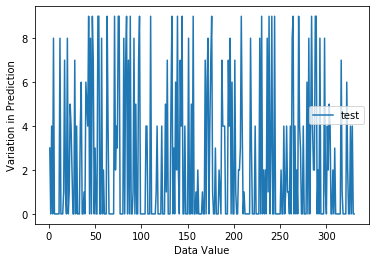

In [48]:
plt.xlabel('Data Value')
plt.ylabel('Variation in Prediction')
plt.plot(Xt,abs(y1-y2),label='test')
# plt.plot(X,y2,label='predictor')
plt.legend()

In [50]:
##LOG REG
